In [20]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import seaborn as sns


In [21]:
df=pd.read_csv('fish_data.csv')
df

,species,length,weight,w_l_ratio
0,Anabas testudineus,10.66,3.45,0.32
1,Anabas testudineus,6.91,3.27,0.47
2,Anabas testudineus,8.38,3.46,0.41
3,Anabas testudineus,7.57,3.36,0.44
4,Anabas testudineus,10.83,3.38,0.31
...,...,...,...,...
4075,Sillaginopsis panijus,30.56,6.12,0.20
4076,Sillaginopsis panijus,29.66,6.11,0.21
4077,Sillaginopsis panijus,32.81,6.25,0.19
4078,Sillaginopsis panijus,29.78,6.11,0.21


In [22]:
print("Data Shape :" , df.shape)

Data Shape : (4080, 4)


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080 entries, 0 to 4079
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   species    4080 non-null   object 
 1   length     4080 non-null   float64
 2   weight     4080 non-null   float64
 3   w_l_ratio  4080 non-null   float64
dtypes: float64(3), object(1)
memory usage: 127.6+ KB


In [24]:
df.describe()

,length,weight,w_l_ratio
count,4080.000000,4080.000000,4080.000000
mean,17.353544,3.739875,0.252782
std,7.114684,1.040365,0.123046
min,6.360000,2.050000,0.080000
25%,11.327500,3.070000,0.170000
50%,17.350000,3.310000,0.190000
75%,22.585000,4.100000,0.340000
max,33.860000,6.290000,0.640000


In [25]:
df.species.value_counts()

species
Setipinna taty            480
Anabas testudineus        476
Pethia conchonius         475
Otolithoides biauritus    468
Polynemus paradiseus      458
Sillaginopsis panijus     455
Otolithoides pama         435
Puntius lateristriga      418
Coilia dussumieri         415
Name: count, dtype: int64

In [26]:
df.isnull().sum()

species      0
length       0
weight       0
w_l_ratio    0
dtype: int64

In [27]:
df.duplicated().sum()

109

# Preparation Data

In [28]:
x=df.drop(columns=['species'])
y=df['species']
print('X : ', x.shape)
print('Y : ', y.shape)

X :  (4080, 3)
Y :  (4080,)


In [29]:
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

In [30]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

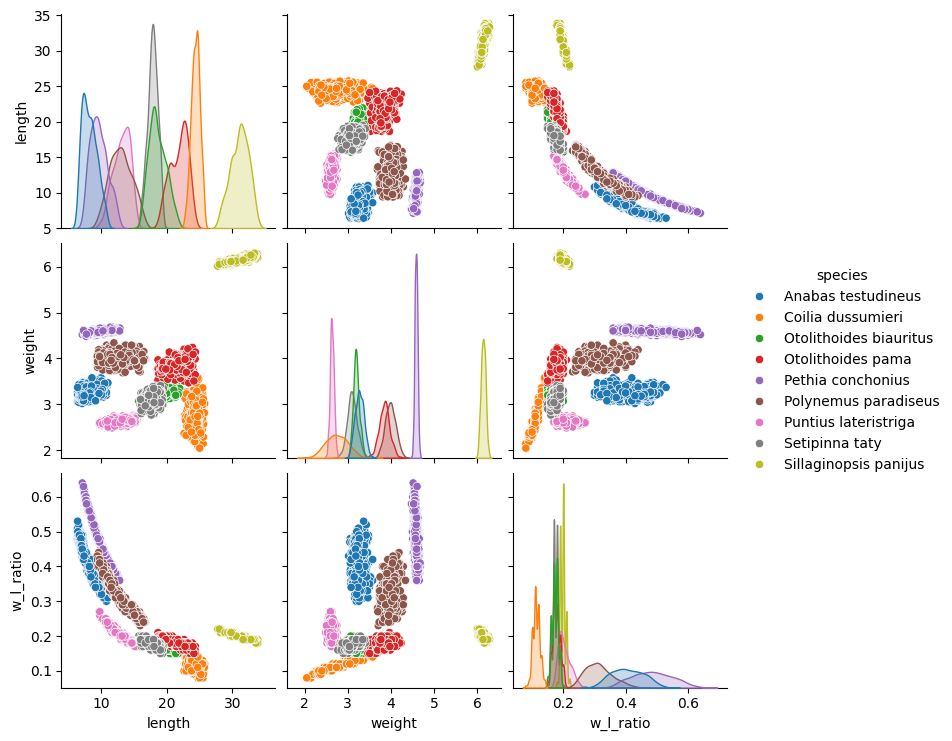

In [31]:
sns.pairplot(data=df, hue = 'species', kind='scatter')


# Modeling & Evaluasi

In [32]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)

svm = SVC(kernel='linear', C=1.0)
svm.fit(x_train_scaled, y_train)


SVC(kernel='linear')

In [33]:
y_pred = svm.predict(x_test)
svm_acc = accuracy_score(y_pred, y_test)
print(classification_report(y_test, y_pred))
print("Akurasi SVM : {:.2f}%".format(svm_acc*100))

                        precision    recall  f1-score   support

    Anabas testudineus       1.00      1.00      1.00        97
     Coilia dussumieri       1.00      0.99      0.99        96
Otolithoides biauritus       0.69      0.67      0.68       100
     Otolithoides pama       0.99      1.00      0.99        85
     Pethia conchonius       1.00      1.00      1.00        84
  Polynemus paradiseus       1.00      1.00      1.00        85
  Puntius lateristriga       1.00      1.00      1.00        74
        Setipinna taty       0.69      0.71      0.70       103
 Sillaginopsis panijus       1.00      1.00      1.00        92

              accuracy                           0.92       816
             macro avg       0.93      0.93      0.93       816
          weighted avg       0.92      0.92      0.92       816

Akurasi SVM : 92.16%


<Axes: >

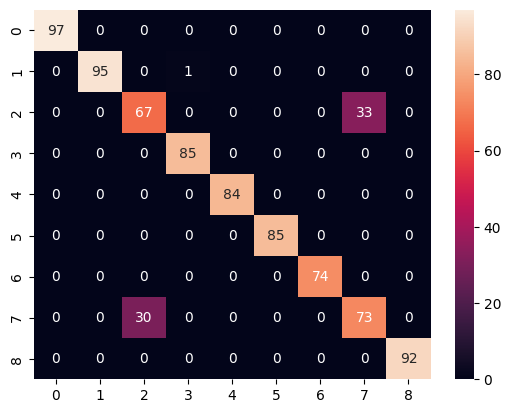

In [34]:
sb.heatmap(confusion_matrix(y_test, y_pred),annot=True)

# Testing

In [35]:
data_baru = {'length' : [21.50], 'weight' : [1.10], 'w_l_ratio' : [1.50]}
data_baru = pd.DataFrame(data_baru)
data_baru

,length,weight,w_l_ratio
0,21.5,1.1,1.5


In [36]:
scaler_data_baru = scaler.transform(data_baru)
y_pred_baru = svm.predict(scaler_data_baru)
print('Spesies Data Baru : ', y_pred_baru)

Spesies Data Baru :  ['Sillaginopsis panijus']


c:\Program Files\Python312\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


In [37]:
import pickle
filename = 'scaler_svm.sav'
pickle.dump(scaler,open(filename,'wb'))

# Save Model

In [38]:
import pickle
filename = 'fish_svm.sav'
pickle.dump(svm,open(filename,'wb'))